In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("s208 - Sheet1.csv")

In [72]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [73]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,109,0.0,0
1,104,0.0,1
2,95,1.0,2
3,140,0.0,3
4,35,1.0,4


In [74]:
len(main_df)

39221

In [75]:
len(main_df)

39221

In [76]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 78.39496698197394
Average2: 2.1765425803161653


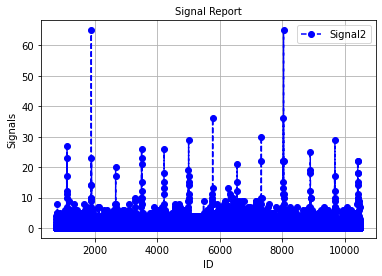

In [77]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [78]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [79]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [80]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,109,0.0
1,104,0.0
2,95,1.0
3,140,0.0
4,107,0.0


In [81]:
len(main_df)

24783

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [82]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [83]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [84]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [85]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[113.57940309792444, 113.59340925539045, 113.71356892462639, 113.75707770188511, 113.7087720823897, 113.7087720823897, 113.67280708554298, 113.69605058748488, 113.82923591720603, 113.87293113134676, 113.86838938445604, 113.98564502921967, 114.08180655064412, 114.09973485924276, 114.0813195696275, 114.10062013482448, 114.21830064407456, 114.25122062429536, 114.37199628997273, 114.31417809323266, 114.3637913313334, 114.32687498324418, 114.29873140153394, 114.42465652210637, 114.35118687356918, 114.40583442069268, 114.33559499485837, 114.31332981650641, 114.31524726638943, 114.39975983587138, 114.41317117086537, 114.51145238478432, 114.4302266347348, 114.44400509869577, 114.4335456220612, 114.40050151758403, 114.41247371425085, 114.4668449196473, 114.36871967633475, 114.30741821328071, 114.34982653

In [86]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [87]:
df.to_csv("s208_50.csv")